# 単回帰分析

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import wooldridge  # wooldridgeのデータ・パッケージ
from statsmodels.formula.api import ols  # 回帰分析のパッケージ
from see import see  # 属性を調べるパッケージ
from numba import njit  # シミュレーションの計算を高速化する

## 用語集

* 横断面データ（cross-sectional data）
    * ある時点において複数の対象を観察し収集したデータ（例えば，2018年の47都道府県の県内総生産）
* 時系列データ（time-series data）
    * ある項目について時間に沿って集めたデータ（例えば，1950~2018年の兵庫県の県内総生産の年次データ）
* パネル・データ（panel ata）
    * 横断面データと時系列データの両方の特徴を兼ね備えたデータ。（例えば，1990~2018年の47都道府県の県内総生産データ）
* 観測値 ＝ observations (observed values)
    * データの値（例えば，価格や人数）
    * a value of individual data

* 標本（サンプル）＝ sample 
    * 観測値で構成されるデータまたはデータ・セット
    * a set of data
* 標本の大きさ ＝ sample size ＝ サンプル・サイズ
    * 母集団から$n$個の観測値を収集したとすると，$n$＝「標本の大きさ」
* 標本数 ＝ number of samples
    * 母集団から$n$個の観測値の標本を$N$組収集したとすると，$N$＝「標本数」
    * $N$の標本数がある場合，個々の標本の大きさを$n_i$, $i=1,2,3,...N$と書くこともできる。
* 統計量 ＝ statistics
    * ２つの意味で使われる
        1. 単純に標本データの特徴を要約するために使われる**関数**。平均の式が一例であり、データが「入力」であり、その平均が「出力」。標本によって異なるため確率変数（random variables）
        1. 上の関数を使い計算した数値
* 推定 ＝ estimation
    * 母集団の未知のパラメータを計算し推知すること
* 推定量 ＝ estimators
    * **母集団のパラメータ**（母数）を推定するために用いる関数としての統計量（例えば，回帰直線の係数の式）
        * 母集団のパラメータという真の値と比較してバイアスを考えることができるのが推定量であるが、統計量はそうではない
    * 標本によって異なるため確率変数（random variables）
* 推定値 ＝ estimates
    * 母集団のパラメータを推知するために推定量を使い実際に計算して得た数値（例えば，回帰の定数項）
    * 確率変数の実現値

* 母集団回帰式 ＝ Population Regression Equation (PRE)
    * 母集団の値を生成する回帰式（観測不可能）
    * データ発生プロセス（Data Generating Process; DGP）
    
        $$y = \beta_0 + \beta_1 x + u$$
    
* 誤差項（攪乱項）＝ (random) errors
    * 母集団回帰式にある観測できないランダム変数（PREの$u$）
* モデル = models
    * 母集団のパラメータを推定するために使う回帰式
    * 最小二乗法推定法は，推定方法でありモデルではないので注意しよう。
* 残差 ＝ residuals
    * 回帰式の被説明変数の観測値と予測値の差（次式の$\hat{u}$）
    
        $$ \hat{u}_i=y_i-\hat{\beta}_0-\hat{\beta}_1x_i$$
    
    * $\hat{\beta}_0$, $\hat{\beta}_0$はデータを使って計算した推定量
    * $i=1,2,...n$（$n$は標本の大きさ）

## 説明

説明変数が１つの単回帰（Simple Regression）を考える。

$$y_i=\beta_0+\beta_1 x_i + u_i$$

* $y_i$： 被説明変数（explained variable）
    * 従属変数（dependent variable）
    * regressand
* $x_i$： 説明変数（explanatory variable）
    * 独立変数（independent variable）
    * regressor
* $u_i$： 誤差項（errors)
    * 観測不可能なランダムな要素
    * 平均はゼロと仮定する（重回帰分析の章でより詳しく説明する）
* $i=1,2,...n$：観測値のインデックス
* $\beta_0$：定数項（観測不可能なため推定する）
* $\beta_1$：スロープ係数（観測不可能なため推定する）

---
**最小二乗法推定法（Ordinary Least Squares; OLS）**

$$\sum_{i=1}^n\left(y_i-\beta_0-\beta_1 x_i\right)^2$$

を最小化する$\beta_0$と$\beta_1$を選択すると以下を得る：

$$
\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x},\qquad\qquad
\hat{\beta}_1=\frac{\text{Cov}(x,y)}{\text{Var}(x)}
$$

* `^`（ハット）がある変数（$\hat{\beta}_0$と$\hat{\beta}_1$）を**OLS推定量**と呼ぶ
* `-`（バー）がある変数（例えば，$\bar{y}$）は平均値
* $\text{Cov}(x,y)=$ $x$と$y$の共分散
* $\text{Var}(x)=$ $x$の分散
* $x$のように添え字$i$を省いた場合は，$x_1$から$x_n$までの全ての観測値という意味（$y$も同じ）

また以下を定義する。
* 予測値 $\hat{y}_i$

$$\hat{y}_i=\hat{\beta}_0 + \hat{\beta}_1x_i$$

* 残差 $\hat{u}_i$

$$\hat{u}_i=y_i-\hat{y}_i$$

データを使ってPythonの使い方を説明するが，次の世界的に有名な教科書のデータを使う。

J.M. Wooldridge (2019) *Introductory Econometrics: A Modern Approach*, Cengage Learning, 7th edition.

## データ

データの読み込みには`wooldridge`のパッケージを使う。使う関数は`data()`であり，引数なしで実行するとデータセットのリストが表示される。

In [2]:
wooldridge.data()

  J.M. Wooldridge (2016) Introductory Econometrics: A Modern Approach,
  Cengage Learning, 6th edition.

  401k       401ksubs    admnrev       affairs     airfare
  alcohol    apple       approval      athlet1     athlet2
  attend     audit       barium        beauty      benefits
  beveridge  big9salary  bwght         bwght2      campus
  card       catholic    cement        census2000  ceosal1
  ceosal2    charity     consump       corn        countymurders
  cps78_85   cps91       crime1        crime2      crime3
  crime4     discrim     driving       earns       econmath
  elem94_95  engin       expendshares  ezanders    ezunem
  fair       fertil1     fertil2       fertil3     fish
  fringe     gpa1        gpa2          gpa3        happiness
  hprice1    hprice2     hprice3       hseinv      htv
  infmrt     injury      intdef        intqrt      inven
  jtrain     jtrain2     jtrain3       kielmc      lawsch85
  loanapp    lowbrth     mathpnl       meap00_01   meap01
  meap93    

以下では`wage1`を使う。データ・セットを読み込むには引数にはデータ・セット名を文字列として入力する。

In [3]:
df = wooldridge.data('wage1')

オプション`description=True`を追加するとデータの説明を表示することができる。

In [4]:
wooldridge.data('wage1',description=True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

このデータを使い以下の問題を考える。

「教育水準は賃金にどのような影響を与えるのか」

* 被説明変数：`wage`
* 説明変数：`educ`

まず関係する変数だけを取り出す。

In [5]:
df = df.loc[:,['wage','educ']]

In [6]:
df.head(3)

,wage,educ
0,3.10,11
1,3.24,12
2,3.00,11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wage    526 non-null    float64
 1   educ    526 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 8.3 KB


In [8]:
df.describe()

,wage,educ
count,526.000000,526.000000
mean,5.896103,12.562738
std,3.693086,2.769022
min,0.530000,0.000000
25%,3.330000,12.000000
50%,4.650000,12.000000
75%,6.880000,14.000000
max,24.980000,18.000000


## 「手計算」

まず上で示した$\hat{\beta}_0$と$\hat{\beta}_1$の式を使い計算する。

まず分散共分散行列を計算する。

In [9]:
mat_wage_educ = np.cov(df['wage'],df['educ'])
mat_wage_educ

array([[13.63888436,  4.150864  ],
       [ 4.150864  ,  7.66748506]])

共分散の値を`cov_wage_edu`に割り当てる。

In [10]:
cov_wage_educ = mat_wage_educ[0, 1]
cov_wage_educ

4.15086399857298

`wage`と`educ`の分散

In [11]:
mat_wage_educ[0,0], mat_wage_educ[1,1]

(13.638884363775007, 7.667485062466051)

次のように計算しても同じ値となる。

In [12]:
var_wage = df['wage'].var(ddof=1)
var_educ = df['educ'].var(ddof=1)
var_wage, var_educ

(13.63888436377501, 7.667485062466051)

平均

In [13]:
mean_wage = df['wage'].mean()
mean_educ = df['educ'].mean()

$\beta_1$の推定値 $\left(\hat{\beta}_1\right)$

In [14]:
b1hat = cov_wage_educ / var_educ
b1hat

0.5413592546651744

$\beta_0$の推定値 $\left(\hat{\beta}_0\right)$

In [15]:
b0hat = mean_wage - b1hat * mean_educ
b0hat

-0.9048516119572092

## `statsmodels`を使う

`statsmodels`のパッケージを使うことにより，多くの計算を自動化できる。以下の順番でおこなう。
* `ols`サブパッケージを読み込む
* 回帰式を定義する
* 推定値の自動計算

**サブパッケージの読み込み**

`statsmodels`には多くのサブパッケージや関数があるが，ここでは回帰式を文字列で書くことができる`ols`をつかう。（他のコードの書き方もあるが，他のトピックで扱う。）

**回帰式の定義**

* 式を`''`で囲む（文字列）
* 定数項である（$\beta_0$）は自動的に挿入される。
    * 定数を省きたい場合は式に`-1`を加える。
    * 後で扱う`linearmodels`パッケージでは，定数が自動的に挿入されないので要注意。

---
定数項がある場合：
```
被説明変数 ~ 説明変数
```
定数項がない場合：
```
被説明変数 ~ -1 + 説明変数
```

---
`wage`を被説明変数にし，定数項を加えて`educ`を説明変数をする場合，次のように書く。

In [16]:
formula = 'wage ~ educ'

**自動計算**

まず自動計算の準備として計算の対象となるもの（インスタンスと呼ばれるオブジェクト）を生成し、"model"の省略形の`mod`に割り当てる。ここで第１引数は上で定義した回帰式，第２引数`data`は使用するデータをの指定。

In [17]:
mod = ols(formula, data=df)

`mod`の属性を調べてみよう。

In [18]:
see(mod)

    <                  <=                 ==                 !=
    >                  >=                 dir()              hash()
    help()             repr()             str()              .data
    .df_model          .df_resid          .endog             .endog_names
    .exog              .exog_names        .fit()
    .fit_regularized()                    .formula           .from_formula()
    .get_distribution()                   .hessian()         .hessian_factor()
    .information()     .initialize()      .k_constant        .loglike()
    .nobs              .predict()         .rank              .score()
    .weights           .wendog            .wexog             .whiten()

この中に実際に計算するためにメソッド`fit()`が準備されており、それを使い結果を`res`に割り当てる（`res`はresultの略）。

In [19]:
res = mod.fit()

上の２つを分けずに一行で書いてもOK。
```
res = old(formula, data=df).fit()
```
`res`の属性をチェックしてみる。

In [20]:
see(res)

    <                    <=                   ==                   !=
    >                    >=                   dir()                hash()
    help()               repr()               str()                .HC0_se
    .HC1_se              .HC2_se              .HC3_se              .aic
    .bic                 .bse                 .centered_tss
    .compare_f_test()    .compare_lm_test()
    .compare_lr_test()                        .condition_number    .conf_int()
    .conf_int_el()       .cov_HC0             .cov_HC1             .cov_HC2
    .cov_HC3             .cov_kwds            .cov_params()        .cov_type
    .df_model            .df_resid            .eigenvals           .el_test()
    .ess                 .f_pvalue            .f_test()
    .fittedvalues        .fvalue              .get_influence()
    .get_prediction()    .get_robustcov_results()
    .initialize()        .k_constant          .llf                 .load()
    .model               .mse_model           .mse_

例えば，上のリストの中に`.params`とあるが，このデータ属性を使い係数の推定値を取り出すことができる。

In [21]:
res.params

Intercept   -0.904852
educ         0.541359
dtype: float64

また`wage`の予測値は`res.fittedvalues`もしくは`res.predict()`で得ることができる。`res.fittedvalues`はデータ属性であり`res.predict()`はメソッドであるが、後者は引数がない場合は前者と同じ結果を返す。

上のリストが示すように`res`には多くの情報が詰まっており，これらを駆使し，図を描いたり推定値の検定をおこなうことになる。

この中にある`summary()`を使い，結果がまとめられた表を出力することも可能である。

In [22]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           2.78e-22
Time:                        16:01:05   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.1

ここで`print()`関数を使ったが、使わなくとも同じ内容を表示できるので試してみよう。

また，この表は３つの表から構成されており，必要な部分だけを表示することも可能である。
```
res.summary().tables[0]
res.summary().tables[1]
res.summary().tables[2]
```
例えば，係数の推定値に関する基本的な統計量だけを表示するには以下のようにすれば良い。

In [23]:
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.187      -2.250       0.441
educ           0.5414      0.053     10.167      0.000       0.437       0.646


OLS推定の結果を割り当てた`res`には，ここで説明した以外に数多くの属性が存在する。それらに関する説明は[このサイト](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html)を参照すること。

## 図

予測値の取得

In [24]:
wage_hat = res.fittedvalues

図の作成

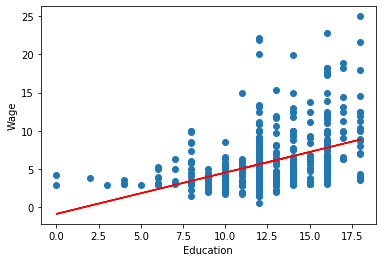

In [25]:
wage_hat = res.fittedvalues
plt.scatter('educ', 'wage', data=df)
plt.plot(df['educ'],wage_hat, 'r')
plt.xlabel('Education')
plt.ylabel('Wage')
pass

## モデルの適合度

* SST（Total Sum of Squares; 全変動の平方和）

$$\text{SST}=\sum_{i=1}^n\left(y_i-\bar{y}\right)^2=(n-1)\cdot\text{Var}(y)$$

* SSE（Explained Sum of Squares; 回帰変動の平方和）

$$
\text{SSE}=\sum_{i=1}^n\left(\hat{y}_i-\bar{y}\right)^2=(n-1)\cdot\text{Var}\left(\hat{y}\right)
$$

* SSR（Residual Sum of Squares; 残差変動の平方和）

$$
\text{SSR}=\sum_{i=1}^n\left(\hat{u}_i-0\right)^2=(n-1)\cdot\text{Var}\left(\hat{u}\right)
$$

ここで，$\text{Var}(z)=\dfrac{1}{n-1}\sum_{i=1}^n\left(z_i-\bar{z}\right)^2$。これらを使い以下を定義する。

---
* 決定係数

$$R^2=\frac{SSE}{SST}=1-\frac{SSR}{SST}$$

$$
R^2
=\frac{\text{Var}\left(\hat{y}\right)}{\text{Var}\left(y\right)}
=1-\frac{\text{Var}\left(\hat{u}\right)}{\text{Var}\left(y\right)}
$$

* 自由度修正後の決定係数

$$\overline{R}^2=1-(1-R^2)\frac{n-1}{n-k-1}$$

ここで，$k=$ **定数項以外の説明変数の数**　（上の例では$k=1$）

ここで説明した数値は，上の例の`res`の属性としてを取得できる。
```
n = res.nobs
k = res.df_model
n-k-1 = res.df_resid
SST = res.centered_tss
SSE = res.ess
SSR = res.ssr
決定係数 = res.rsquared
修正済み決定係数 = res.rsquared_adj
```

In [26]:
n = res.nobs
k = res.df_model
# n-k-1 = res.df_resid
SST = res.centered_tss
SSE = res.ess
SSR = res.ssr

**決定係数**

In [27]:
res.rsquared

0.16475751099205138

In [28]:
1-SSR/SST

0.16475751099205138

In [29]:
u_hat = res.resid  # 残差
wage = df['wage']  # 被説明変数
R2 = 1 - np.var(u_hat) / np.var(wage)
R2

0.16475751099205127

**修正済み決定係数**

In [30]:
res.rsquared_adj

0.16316353677638729

In [31]:
adjR2 = 1-(1-R2)*(n-1)/(n-k-1)
adjR2

0.16316353677638729

## 変数の変換

上の回帰分析では被説明変数は`wage`をそのまま使ったが，労働経済学では賃金の対数をとり推定するのが一般的であり，そのような式を賃金方程式と呼ぶ。その考えに沿って，ここでは`wage`の自然対数変換をおこない回帰分析をおこなう。

### 方法１：回帰式を直接書き換える

`numpy`の対数関数を使って，回帰式の中で直接書き換えることができる。

In [32]:
formula_1 = 'np.log(wage) ~ educ'

In [33]:
res_1 = ols(formula_1, data=df).fit()

In [34]:
res_1.params

Intercept    0.583773
educ         0.082744
dtype: float64

（解釈）

`res_1`は次式の推定結果である。

$\ln y = \beta_0+\beta_1x+u$

この式を$x$について微分すると以下を得る。

$\dfrac{d\ln y}{dx}=\dfrac{dy/y}{dx}=\dfrac{y\text{の%変化}}{dx}=\beta_1$

即ち，$\beta_1$は$x$（教育年数）が一単位増加した場合，$y$（賃金）が何％変化するかを示している（教育の収益率）。このOLS推定結果によると、教育年数が１年増えると賃金は8.2%増加する。

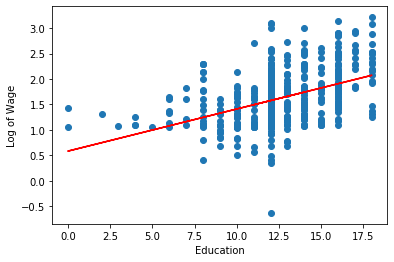

In [35]:
wage_log_hat_1 = res_1.fittedvalues
plt.scatter(df['educ'], np.log(df.loc[:,'wage']))
plt.plot(df['educ'], wage_log_hat_1, 'r')
plt.xlabel('Education')
plt.ylabel('Log of Wage')
pass

### 方法２：事前に変数を作成

方法１では回帰式を直接書き換えたが、ここでは事前に変数を新しく生成し推定する。

In [36]:
df['wage_log'] = np.log(df['wage'])

In [37]:
formula_2 = 'wage_log ~ educ'

In [38]:
res_2 = ols(formula_2, data=df).fit()

In [39]:
print(res_2.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.000       0.393       0.775
educ           0.0827      0.008     10.935      0.000       0.068       0.098


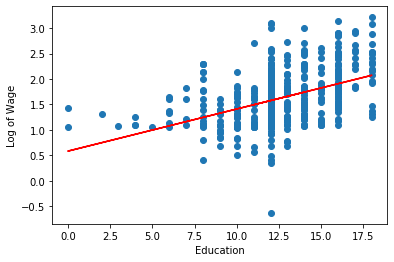

In [40]:
wage_log_hat_2 = res_2.fittedvalues
plt.scatter('educ', 'wage_log', data=df)
plt.plot(df['educ'], wage_log_hat_2, 'r')
plt.xlabel('Education')
plt.ylabel('Log of Wage')
pass

## シミュレーション：$OLS$推定

### 母集団の考え方

分析の対象となる共通の属性などを持つ個人・企業・産業・地域・国などの集合体といえる。ここで重要な点は母集団の大きさとランダム抽出の関係である。

* 「人間の身長」の母集団：地球上の人間
    * 全員の身長を測るのはあまりにも費用が高い $\Rightarrow$ 標本の大きさ$<$母集団の大きさ
* 「OECD諸国のGDP」の母集団：34カ国
    * 2018年のGDPは簡単に入手可能 $\Rightarrow$ 標本の大きさ$=$母集団の大きさ？
    * 等号で成立する場合，標本ではなく母集団全てのデータを扱うことになり，標本の概念である標準誤差などは意味がなくなる！
    * ２つの考え方：標本の大きさ$<$母集団の大きさ
        1. 国と時間の概念で考えると母集団の大きさは$\infty$
        2. 確率変数とは実現可能な数値から１つを実現させる関数である。またGDP自体は確率変数として解釈する方が自然である（「重回帰分析」で説明する仮定２を参照）。従って，34カ国の実現可能なGDPの値が母集団となる。この解釈によると，標本の大きさ$<$母集団の大きさ。

### プラン

回帰分析の理解を深めるするためにシミュレーションを以下の手順でおこなう。

**＜Step 1＞**
* 母集団の大きさは指定しない。
* 母集団のデータを生成する回帰式（母集団回帰式）を定義する。

    $$Y = \beta_0 + \beta_1 X + U$$

    * 説明変数$X$と誤差項$U$はランダム変数であり，従って$Y$もランダム変数である。
* 母集団から標本を$n$個抽出する。
    * 抽出された値はランダム変数の実現値
    
        $$(y_1,x_1),\;(y_2,x_2),.....(y_n,x_n)$$
        
    * 仮定
        * $X$は正規分布に従う $\Rightarrow$ $x_1,\;x_2,..x_n$は$X$の実現値。
        * $U$は正規分布に従う $\Rightarrow$ $u_1,\;u_2,..u_n$は$U$の実現値。
        * $X$と$U$は無相関。
        * 実現値$y_1,\;y_2,..y_n$は母集団回帰式に従って生成される。
        
            $$y_i = \beta_0 + \beta_1 x_i + u_i,\qquad i=1,2,3,....n$$
            
    * $\beta_0$と$\beta_1$は未知であり，$u_i$も観測不可能

**＜Step 2＞**
* $n$個の標本を使い回帰分析を行い，母集団の回帰式のパラメータを推定する。
    * $\hat{\beta}_0$，$\hat{\beta}_1$

### シミュレーション

母集団のパラメータの設定

In [41]:
b0 = 1.0  # 定数項
b1 = 1.0  # 説明変数の係数
su = 1.0  # 誤差項の標準偏差

標本の大きさ

In [42]:
n = 30

ランダム変数の生成による標本抽出

In [43]:
x = norm.rvs(4, 1, size=n)
u = norm.rvs(0, su, size=n)
y = b0 + b1 * x + u

このデータから`DataFrame`を作成する。`()`の中の`{}`は辞書。

In [44]:
df_sim = pd.DataFrame({'X':x, 'Y':y})

`OLS`推定

In [45]:
formula = 'X ~ Y'
res_sim = ols(formula, data=df_sim).fit()

係数の推定値

In [46]:
res_sim.params

Intercept    1.059555
Y            0.620556
dtype: float64

母集団パラメータと比べると、推定誤差が発生していることがわかる。

### 関数化

`def`を使って上のコードを関数としてまとめる。
* 引数
    * 標本の大きさ：`n`
    * 真の定数項：`b0`（デフォルトは`1`）
    * 真のスロープ係数：`b1`（デフォルトは`0.5`）
    * 誤差項の標準偏差：`su`（デフォルトは`1`）
* 返り値
    * 定数項とスロープ係数お推定値（`pandas.Series`）

In [47]:
def my_sim(n,b0=1,b1=0.5,su=1):  # nを指定する，　他はデフォルトを設定
    
    x = norm.rvs(4, 1, size=n)
    u = norm.rvs(0, su, size=n)
    y = b0 + b1 * x + u
    
    df_sim = pd.DataFrame({'X':x, 'Y':y})
    
    formula = 'Y ~ X'
    res_sim = ols(formula, data=df_sim).fit()
    
    return res_sim.params

In [48]:
my_sim(100)

Intercept    0.850564
X            0.555474
dtype: float64

`b0`，`b1`，`su`変えて計算してみよう。

---
シミュレーションで同じ計算を数十万回おこなう場合，１回のシミュレーションに時間がかかり，それをどのように高速化するかが問題になる。その際，役に立つパッケージが`Numba`であり，１行のコードを追加するだけで計算を驚く程高速化できる。しかし`Numba`には「相性」の問題がある。例えば，上の関数`my_sim()`で使った`statsmodels`，`pandas`，`scipy.stats`は`Numba`と相性が悪いが，`Numpy`は非常に相性が良いのである。また，`Numba`を使う際，リストよりも`array`を使う方が少しでも高速化を図ることができることも覚えておくと良いだろう。以下では，`Numba`を使うために`Numpy`を使う「手計算」による関数も考えることにする。

In [49]:
def my_sim_manual(n,b0=1,b1=0.5,su=1):  # nを指定する，　他はデフォルトを設定
    
    x = np.random.normal(loc=4, scale=1, size=n)
    u = np.random.normal(loc=0, scale=su, size=n)
    y = b0 + b1 * x + u
    
    var_cov = np.cov(y,x)  # 分散共分散行列
    cov_yx = var_cov[0,1]  # 共分散
    var_y = var_cov[0,0]  # yの分散
    var_x = var_cov[1,1]  # xの分散        
    avr_y = y.mean()      # yの平均
    avr_x = x.mean()      # xの平均
    
    b1hat = cov_yx / var_x  # スロープ係数        
    b0hat = avr_y - b1hat*avr_x  # 定数項
    
    return b0hat, b1hat  # 推定値

ここで使った`np.random.normal()`について簡単に説明する。`Numpy`にはランダム変数を生成する`random`というサブパッケージがあり，その中の`normal()`を使う。これは`scipy.stats`の`norm.rvs()`と同じ引数を取り，同じ返り値を返す。

In [50]:
my_sim_manual(100)

(1.6094924100983297, 0.37621198975571984)

`my_sim()`と`my_sim_manual()`の推定値が異なるのはランダム変数（`y`，`x`）の値が異なるためであり，それが推定誤差である。

### ループを使ってシミュレーション

* 標本の大きさ`n`のデータを`N`組用意し（`N`は標本数），`OLS`推定を`N`回おこなう。
* シミュレーション毎に計算した回帰係数の推定値の分布を図示する。

まず`def`を使いシミュレーションの関数を作成するが，パラメータの推定値の計算には`statsmodels`を使わずに，`numpy`の関数を使い「手計算」とする。これにより計算を高速化するパッケージ`Numba`を使うことが可能となる。使い方は簡単でデコレーターと呼ばれる`@njit`（又は`@jit`）を関数の上に加えるだけである。これだけで計算速度が数十倍早くなる場合もある。

In [51]:
@njit
def my_sim_loop(n,N,b0=1.0,b1=1.0,su=1.0):  # nとN以外はデフォルトを指定
    
    b0hat_arr = np.zeros(N)  # OLS推定量を入れるarray（0がN個並んでいる）
    b1hat_arr = np.zeros(N)  # OLS推定量を入れるarray（0がN個並んでいる）
    
    c = np.ones(n)  # 定数項（1.がn個並んでいる）
    
    for i in range(N):  # N 回のループ
        
        x = np.random.normal(loc=4, scale=1.0, size=n)
        u = np.random.normal(loc=0, scale=1.0, size=n)
        y = b0 + b1 * x + u
      
        var_cov = np.cov(y,x)  # 分散共分散行列
        cov_yx = var_cov[0,1]  # 共分散
        var_y = var_cov[0,0]  # yの分散
        var_x = var_cov[1,1]  # xの分散        
        avr_y = y.mean()      # yの平均
        avr_x = x.mean()      # xの平均
        
        b1hat = cov_yx / var_x  # スロープ係数の推定値
        b0hat = avr_y - b1hat*avr_x  # 定数項の推定値

        b0hat_arr[i] = b0hat  # i番目に定数項の推定値をarrに追加
        b1hat_arr[i] = b1hat  # i番目にスロープ係数の推定値をarrに追加
        
    return b0hat_arr, b1hat_arr  # N回ループ終了後にarrayをタプルとして返すオブジェクト

シミュレーションの回数

In [52]:
N=100_000

シミュレーションの開始

In [53]:
b0hat, b1hat = my_sim_loop(50,N)

```{note}
初めて`my_sim_loop()`を実行すると`Numba`はコンパイルと呼ばれる高速化準備プロセスを経るため，`@njit`がない場合と比べて実行スピードは早くない。２回目の実行から`Numba`の効果が発揮されることになる。
```

$\hat{\beta}_0$の分布

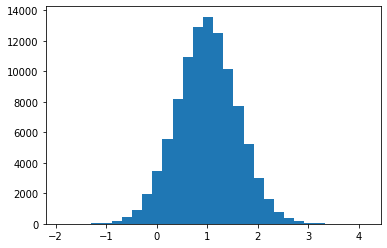

In [54]:
plt.hist(b0hat,bins=30)
pass

$\hat{\beta}_1$の分布

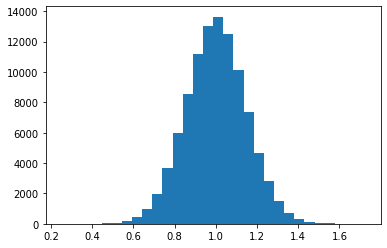

In [55]:
plt.hist(b1hat,bins=30)
pass

`y`の理論値を図示するが，図示の時間短縮のために`N`回のシミュレーション中の最初の`r`回の回帰線だけを表示する。

In [56]:
r = 1000

`for`ループを使って重ねて図示する

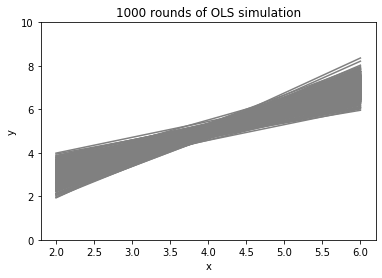

In [57]:
xx = np.linspace(2,6,50)

for i in range(r):  # r回のループで図示
    yhat = b0hat[i] + b1hat[i]*xx  # yの予測値
    plt.plot(xx, yhat, 'grey')  # yの予測値を図示
    
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,10) # 縦軸の表示範囲を設定
plt.title(f'{r} rounds of OLS simulation')
pass

上のコード・ブロックの最後から２行目に`f'{r} rounds of OLS simulation'`とある。文字列の前に`f`を置き、文字列の中で変数を`{}`で囲むと変数の値を代入してくれるのである。これを`f-string`と呼ぶ。

---
**＜シミュレーションの含意＞**

まず２つのヒストグラムをみると，値にばらつきがある。これは推定量（$\hat{\beta}_0$と$\hat{\beta}_1$）が確率変数であるためである。その実現値は，真の値（$\beta_0=1.0$と$\beta_1=1.0$）を中心に左右対象に分布している。即ち，推定量は不偏性を満たしている。次の章で簡単に説明するが，上で行ったシミュレーションは不偏推定量に必要な仮定を満たしているのである。

これを踏まえて，回帰直線の図を考えよう。同じ回帰式を使い`N`回のシミュレーションを行い，最初の`r`個の回帰直線を重ねて描いているためパイプのような形になっている。一方で，実際の実証分析ではこのような繰り返しの試行は不可能であり多くの場合は一度だけである。言い換えると，実証研究では`N`個の回帰直線の中から１つだけを結果としてランダムに「選んでいる」のと等しい。この意味を更に考えるために，（標本の大きさは所与として）たまたま２組みのデータセットが手に入り，別々の回帰分析を行ったとしよう。その場合，パイプの幅が広ければ広いほど，２つの回帰直線の位置は大きく異なる可能性が高くなり，正確性が低い結果になる。逆に，パイプの幅が狭ければ狭いほど，２つの結果は似たものになり，より正確な推定結果となる。このように実証分析ではパイプの幅が可能な限り小さくなる工夫が必要になる。その１つが標本の大きさ`n`である。直感的にわかると思うが，`n`が増えるとパイプは細くなり，極限$n\rightarrow\infty$（即ち，標本の大きさと母集団の大きさの差が限りなくゼロに近づく）ではパイプの形が直線（母集団回帰式）に近づくことは容易にイメージできるのではないだろうか。このように，実証分析において標本の大きさは非常に重要な役割を果たすことになる。

（注意）

* このシミュレーションの場合，推定量の**一致性**が満たされているため，パイプが母集団回帰式に収束することになる。しかし一般的に必ずそうなるとは限らない。ある仮定のもとでのみ推定量は一致性を満たすことになる。
* 推定方法によっては，不偏性は満たさないが一致性を満たす推定量も存在する。また，エギゾチックな例になるがその逆もあり得る。

---
----- Give it a try! -----

標本の大きさ`n`を変えて試してみよう。例えば，10, 30, 100, 500, 1000。